En esta ocasión, agregamos ruido a la imagen al importarla.

In [1]:
# libraries
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
import numpy as np

# functions to load and show images (rgb to grayscale)
def load_image(path):
    im = imread(path)
    X = im.dot([0.299, 0.5870, 0.114]) # to grayscale
    noise = np.random.normal(0, 60, X.shape)  # Add Gaussian noise with mean 0 and std 40
    X += noise
    return X

def show_image(X, title):
    plt.figure(figsize=(9, 6))
    plt.imshow(X, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

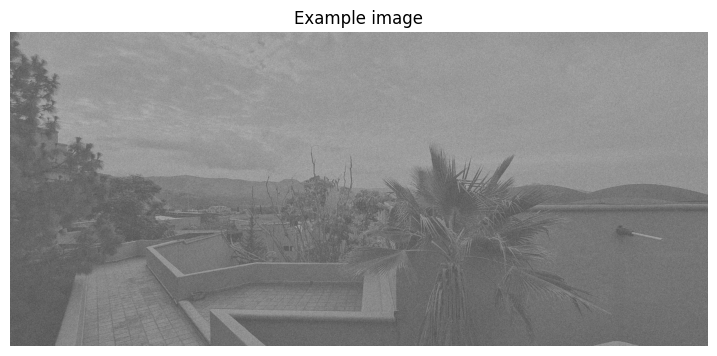

In [2]:
image = load_image("C:/Users/micke/Documents/Python/Patrones/Tarea 1/foto.jpg")
show_image(image, "Example image")
imsave("original.png", image, cmap='gray')

Para ver los efectos de la descomposición SVD tomando los primeros $p$ vectores en la descomposición.

In [3]:
def svd_effect(image, p):
    U, S, V = np.linalg.svd(image, full_matrices=False) # decomposition
    image_p =  (U[:,:p] * S[:p]) @ V[:p,:] # reconstruction using first p components
    error_p = (np.linalg.norm(image - image_p, 'fro') / np.linalg.norm(image, 'fro')) ** 2 # reconstruction error
    return image_p, error_p

Aplicamos el método de SVD a la imagen y mostramos los resultados para diferentes valores de $p$. Además, calculamos el error de reconstrucción para cada valor de $p$ y lo imprimimos en pantalla.

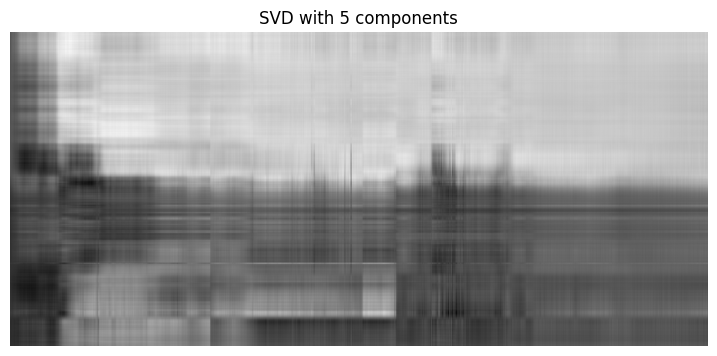

Error for 5 components: 0.16513580684600843


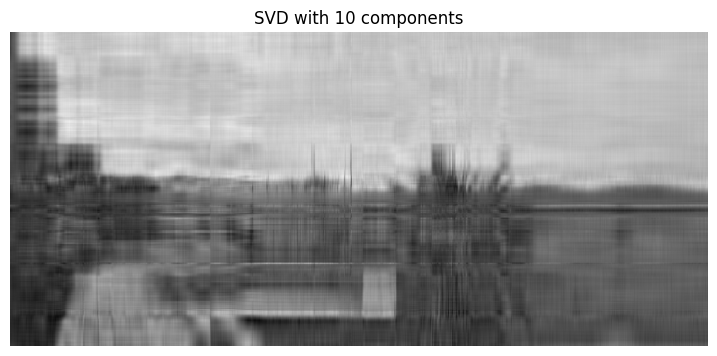

Error for 10 components: 0.15875481510373318


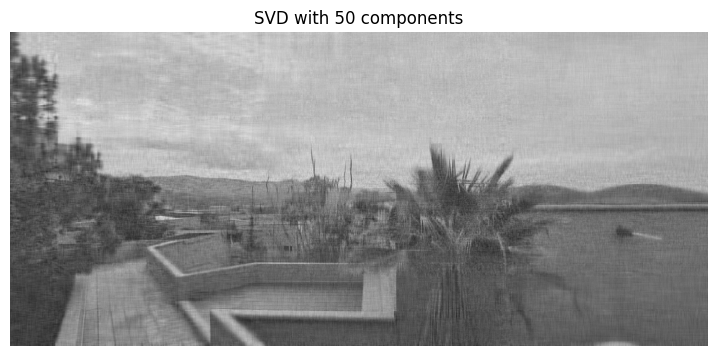

Error for 50 components: 0.1449971987791295


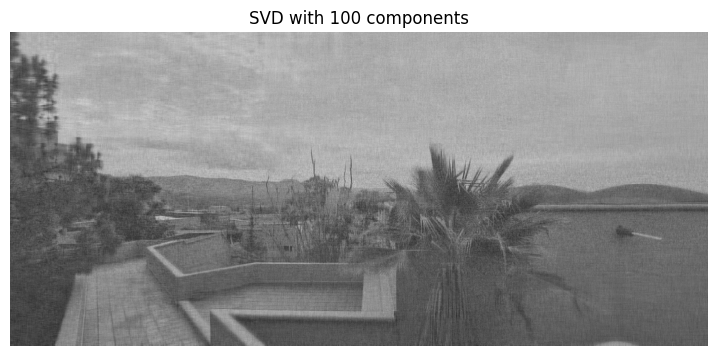

Error for 100 components: 0.13411090745279042


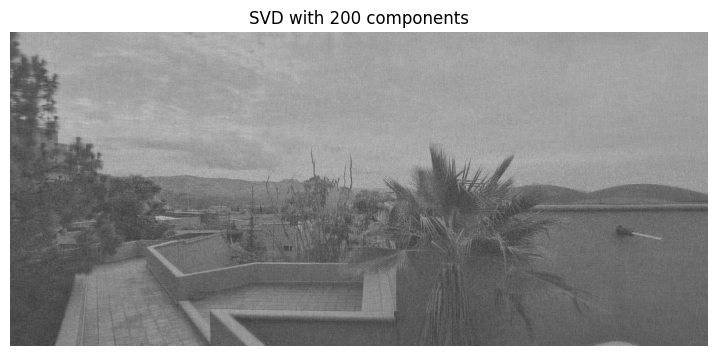

Error for 200 components: 0.11532735091453057


In [4]:
P = [5, 10, 50, 100, 200]
for p in P:
    image_p, error_p = svd_effect(image, p)
    show_image(image_p, title=f"SVD with {p} components")
    print(f"Error for {p} components: {error_p}")

Hacemos el mismo procedimiento, pero utilizando descomposición SVD en bloques de tamaño $k$ por $k$, y tomando los primeros $p$ vectores en la descomposición de cada bloque.

In [5]:
def svd_on_blocks(image, p, k):
    h, w = image.shape
    
    # We will apply a padding to the image so that it can be divided into kxk blocks without losing information.
    # Adjust image dimensions to be divisible by k
    h_adj = (h + k - 1) // k * k
    w_adj = (w + k - 1) // k * k
    
    image_pad = np.pad(image, ((0, h_adj - h), (0, w_adj - w)), mode='edge')
    
    blocks = []
    for i in range(0, h_adj, k):
        for j in range(0, w_adj, k):
            blocks.append(image_pad[i:i+k, j:j+k].flatten())
    
    # Apply SVD effect on auxiliary matrix
    aux_p, _ = svd_effect(np.array(blocks).T, p)
    
    # Reconstruct blocks from modified auxiliary matrix
    reconstructed_blocks = aux_p.T.reshape(-1, k, k)
    
    # Rebuild the original image from blocks
    reconstructed_image = np.zeros((h_adj, w_adj))
    idx = 0
    for i in range(0, h_adj, k):
        for j in range(0, w_adj, k):
            reconstructed_image[i:i+k, j:j+k] = reconstructed_blocks[idx]
            idx += 1
    error = (np.linalg.norm(image - reconstructed_image[:h, :w], 'fro') / np.linalg.norm(image, 'fro')) ** 2 # reconstruction error
    return reconstructed_image[:h, :w], error


Aplicamos el método de SVD por bloques a la imagen con $k=15$ y mostramos los resultados para diferentes valores de $p$. Además, calculamos el error de reconstrucción para cada valor de $p$ y lo imprimimos en pantalla.

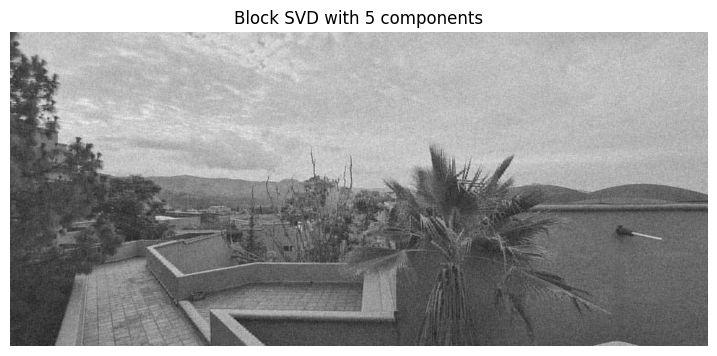

Error for 5 components: 0.14710278971796306


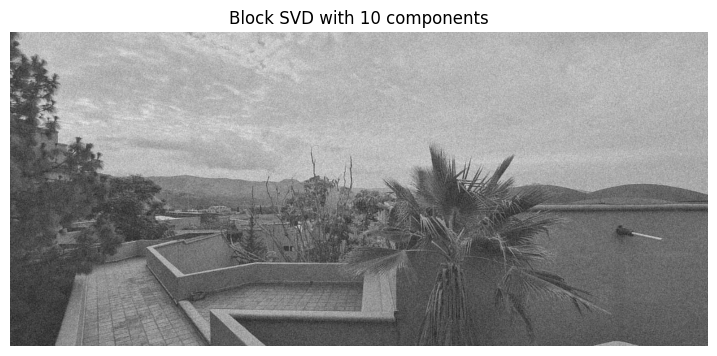

Error for 10 components: 0.14183888382536528


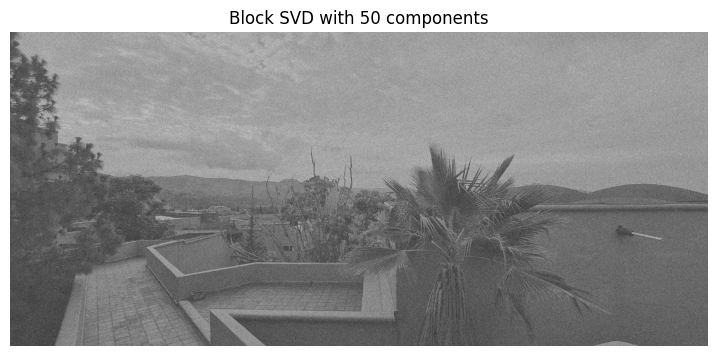

Error for 50 components: 0.11117634021931709


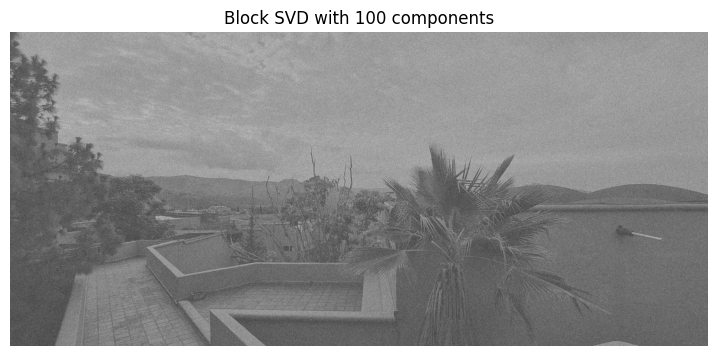

Error for 100 components: 0.07667199942569847


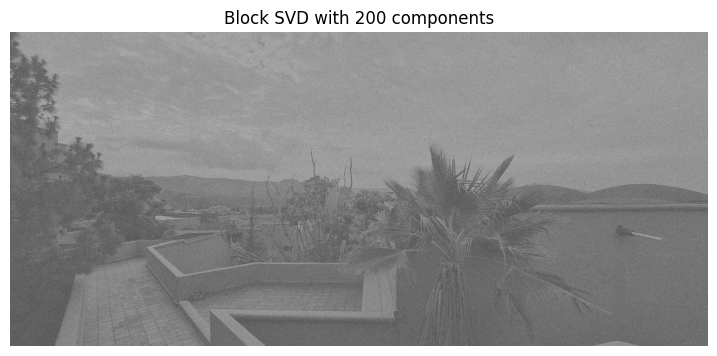

Error for 200 components: 0.014189216530438087


In [6]:
for p in P:
    image_p, error_p = svd_on_blocks(image, p, k=15)
    show_image(image_p, title=f"Block SVD with {p} components")
    print(f"Error for {p} components: {error_p}")


El método de SVD por bloques funciona mucho mejor que el original, incluso para $p=10$ y $p=50$, el ruido se reduce con respecto a la imagen original con ruido. Podemos concluir que este método funciona muy bien.